## 1. Importing Libraries
We start by importing the required libraries for data handling, visualization, and analysis.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




## 2. Load Dataset
We define the column names and load the training, testing, and RUL datasets.

In [3]:

# Define column names (unit, cycle, 3 operational settings, 21 sensors)
cols = ['unit','cycle','op1','op2','op3'] + [f's{i}' for i in range(1,22)]

# Load train, test, and RUL datasets
train = pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt", sep='\s+', header=None, names=cols)
test  = pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt",  sep='\s+', header=None, names=cols)
rul   = pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt",   sep='\s+', header=None, names=['RUL'])

# Display first few rows
train.head()


,unit,cycle,op1,op2,op3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


## 3. Dataset Overview
Check the shape, number of unique engines, and descriptive statistics.

In [4]:

# Display dataset shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Number of unique engines in train and test
print("Unique engines in train:", train['unit'].nunique())
print("Unique engines in test:", test['unit'].nunique())

# Show descriptive statistics for first 10 columns
train.describe().T.head(10)


Train shape: (53759, 26)
Test shape: (33991, 26)
Unique engines in train: 260
Unique engines in test: 259


,count,mean,std,min,25%,50%,75%,max
unit,53759.0,131.082981,74.463862,1.00,68.0000,131.0000,195.000,260.000
cycle,53759.0,109.154746,69.180569,1.00,52.0000,104.0000,157.000,378.000
op1,53759.0,23.998407,14.747376,0.00,10.0046,25.0013,41.998,42.008
op2,53759.0,0.572056,0.310016,0.00,0.2507,0.7000,0.840,0.842
op3,53759.0,94.046020,14.237735,60.00,100.0000,100.0000,100.000,100.000
s1,53759.0,472.910207,26.389707,445.00,445.0000,462.5400,491.190,518.670
s2,53759.0,579.672399,37.289399,535.53,549.5700,555.9800,607.340,644.520
s3,53759.0,1419.971013,105.946341,1243.73,1352.7600,1369.1800,1499.370,1612.880
s4,53759.0,1205.442024,119.123428,1023.77,1123.6550,1138.8900,1306.850,1439.230
s5,53759.0,8.031986,3.613839,3.91,3.9100,7.0500,10.520,14.620


## 4. Distribution of Engine Lifetimes
Show how many cycles each engine survives before failure.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


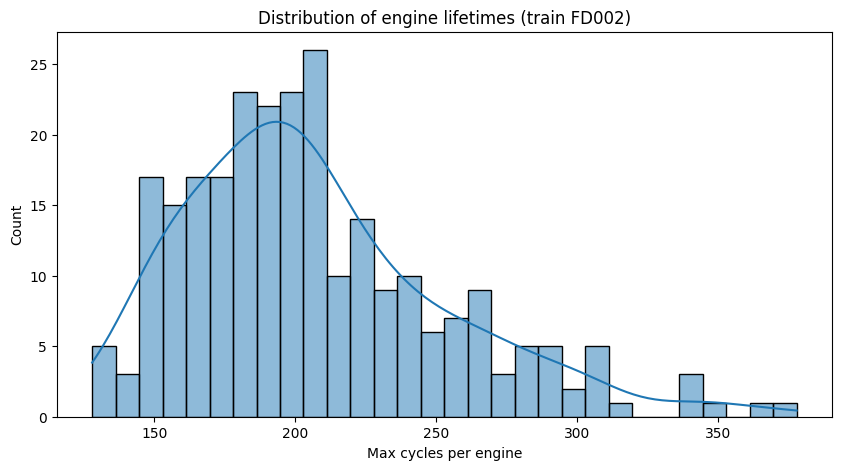

In [5]:

# Calculate maximum cycles for each engine
cycles_per_engine = train.groupby('unit')['cycle'].max()

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(cycles_per_engine, bins=30, kde=True)
plt.xlabel("Max cycles per engine")
plt.ylabel("Count")
plt.title("Distribution of engine lifetimes (train FD002)")
plt.show()


## 5. Distribution of Operational Settings
Visualize how the three operating conditions are distributed.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


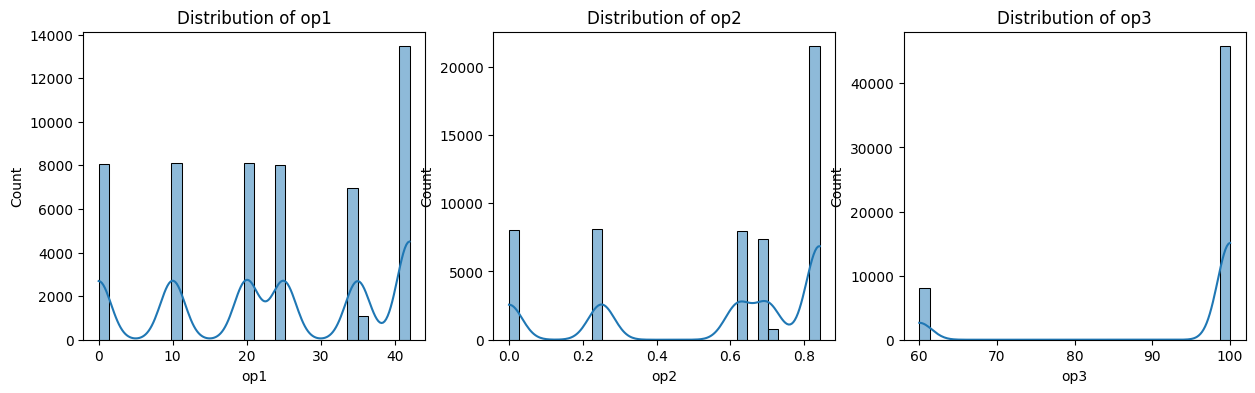

In [6]:

fig, axes = plt.subplots(1, 3, figsize=(15,4))

# Plot each operational setting distribution
for i, op in enumerate(['op1','op2','op3']):
    sns.histplot(train[op], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {op}")

plt.show()


## 6. Sensor Variance
Check variance of each sensor to identify informative sensors.

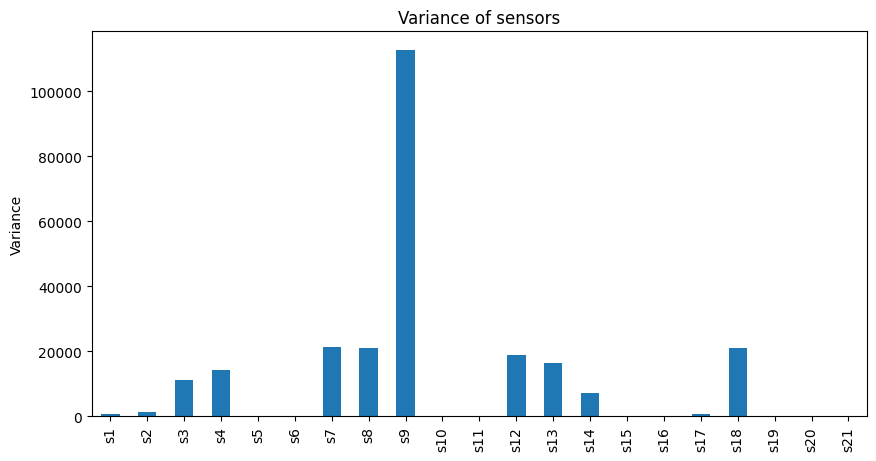

In [7]:

# Calculate variance of all sensors
sensor_var = train[[f's{i}' for i in range(1,22)]].var()

# Plot variance
plt.figure(figsize=(10,5))
sensor_var.plot(kind='bar')
plt.title("Variance of sensors")
plt.ylabel("Variance")
plt.show()


## 7. Sensor Behavior Over Time
Visualize sensor readings over cycles for a specific engine.

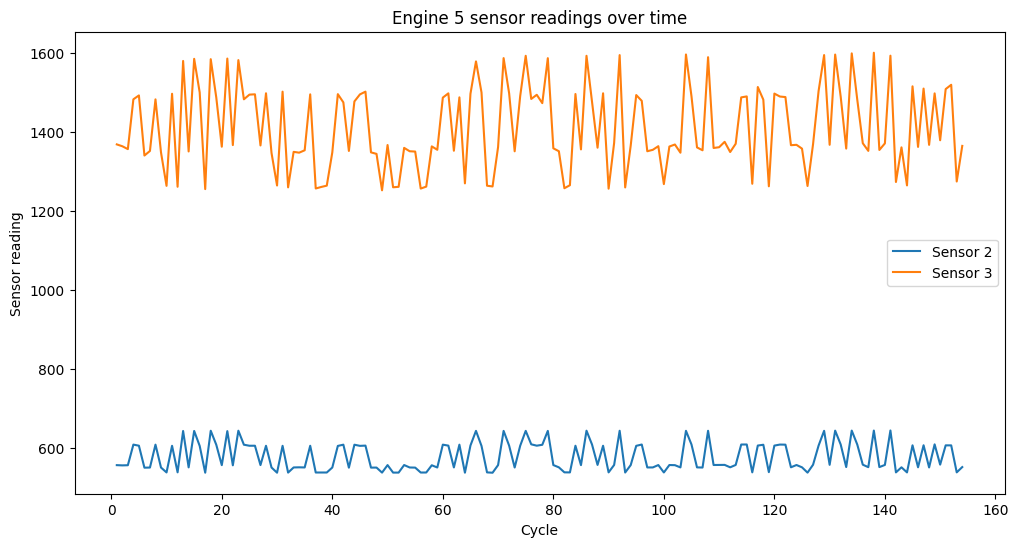

In [8]:

# Select one engine for example visualization
engine_id = 5
engine_data = train[train['unit']==engine_id]

plt.figure(figsize=(12,6))
plt.plot(engine_data['cycle'], engine_data['s2'], label='Sensor 2')
plt.plot(engine_data['cycle'], engine_data['s3'], label='Sensor 3')
plt.xlabel("Cycle")
plt.ylabel("Sensor reading")
plt.title(f"Engine {engine_id} sensor readings over time")
plt.legend()
plt.show()


## 8. Correlation Between Sensors
Visualize how different sensors are correlated.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


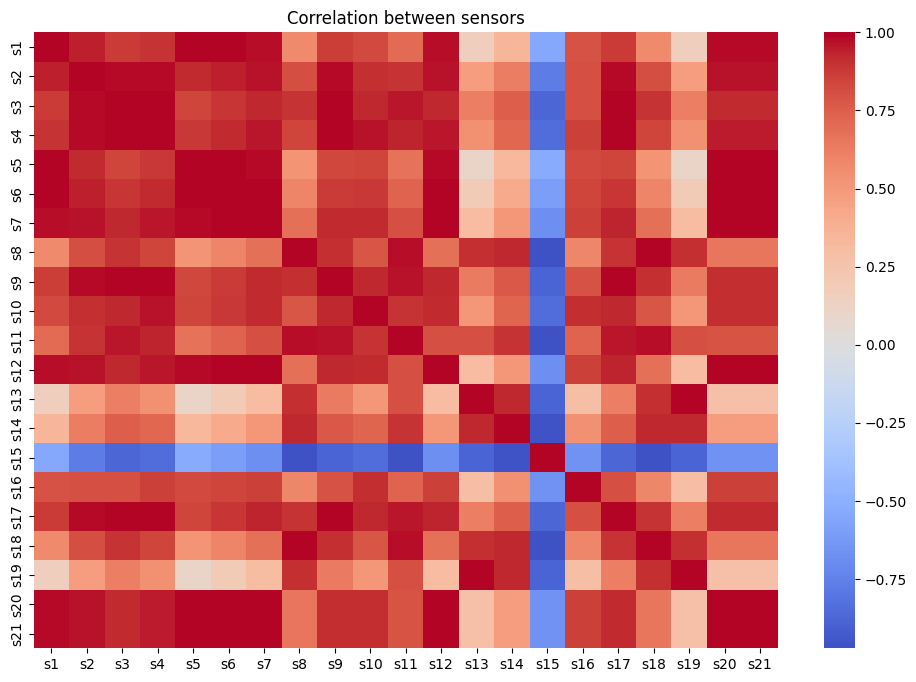

In [9]:

# Compute and plot correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(train[[f's{i}' for i in range(1,22)]].corr(), cmap="coolwarm", center=0)
plt.title("Correlation between sensors")
plt.show()


## 9. Add RUL to Training Data
Compute Remaining Useful Life for each record in training data.

In [10]:

# Get max cycle per engine
max_cycle = train.groupby('unit')['cycle'].max().reset_index()
max_cycle.columns = ['unit','max_cycle']

# Merge with train to calculate RUL
train = train.merge(max_cycle, on='unit', how='left')
train['RUL'] = train['max_cycle'] - train['cycle']
train.drop('max_cycle', axis=1, inplace=True)

# Show updated dataset
train.head()


,unit,cycle,op1,op2,op3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144


## 10. Sensor vs RUL Relation
Check if a sensor has a clear trend with RUL.

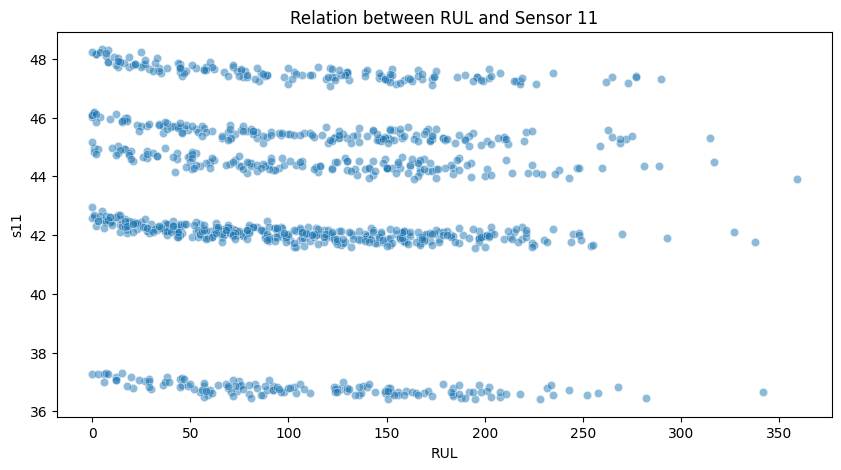

In [11]:

plt.figure(figsize=(10,5))

# Take a sample of data for better visualization
sns.scatterplot(data=train.sample(1000), x='RUL', y='s11', alpha=0.5)
plt.title("Relation between RUL and Sensor 11")
plt.show()


## Preprocessing

In [12]:
# Add RUL to training set
max_cycle = train.groupby('unit')['cycle'].max().reset_index()
max_cycle.columns = ['unit','max_cycle']
train = train.merge(max_cycle, on='unit', how='left')
train['RUL'] = train['max_cycle'] - train['cycle']
train.drop('max_cycle', axis=1, inplace=True)


In [13]:
# Add RUL to test set
max_cycle_test = test.groupby('unit')['cycle'].max().reset_index()
max_cycle_test.columns = ['unit','max_cycle']
test = test.merge(max_cycle_test, on='unit', how='left')

In [14]:
# Compute RUL for test
test = test.merge(rul, left_on='unit', right_index=True, how='left')
test['RUL'] = test['RUL'] + (test['max_cycle'] - test['cycle'])
test.drop('max_cycle', axis=1, inplace=True)

In [16]:
# 2. Drop non-informative sensors (low variance)
low_var_sensors = ['s1','s5','s10','s16','s18','s19']  # known from EDA/NASA papers
train.drop(columns=low_var_sensors, inplace=True)
test.drop(columns=low_var_sensors, inplace=True)



In [18]:
# 3. Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = train.columns.difference(['unit','cycle','RUL'])

train[features] = scaler.fit_transform(train[features])
test[features]  = scaler.transform(test[features])

train.head()

,unit,cycle,op1,op2,op3,s2,s3,s4,s6,s7,...,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,1,0.833134,0.997625,1.0,0.181576,0.311201,0.273095,0.144025,0.138036,...,0.289692,0.471498,0.136817,0.992394,0.476508,0.369947,0.322917,0.156036,0.159082,148
1,1,2,0.999767,0.998575,1.0,0.131847,0.296600,0.245535,0.000000,0.004081,...,0.258841,0.486156,0.003297,0.992229,0.533013,0.381407,0.281250,0.007888,0.014562,147
2,1,3,0.595096,0.738480,0.0,0.016332,0.035297,0.056997,0.208176,0.092860,...,0.012893,0.037459,0.089030,0.001157,0.039296,0.936731,0.062500,0.133745,0.151414,146
3,1,4,0.999993,0.999525,1.0,0.128269,0.298795,0.246979,0.000000,0.003962,...,0.258841,0.466612,0.004058,0.992091,0.524349,0.372400,0.270833,0.014060,0.026144,145
4,1,5,0.595137,0.736698,0.0,0.014130,0.037871,0.058152,0.208805,0.091284,...,0.006235,0.053746,0.089258,0.001075,0.030633,0.937537,0.062500,0.135460,0.143240,144
